# Assignment 1: *Object Recognition*

In [1]:
#Importing the required libraries 
import numpy  as np  
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import keras
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint, Callback
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, load_model, Sequential
from keras.layers import Input, Dense, Dropout, Flatten, BatchNormalization, TimeDistributed, LSTM
from keras.layers import Conv2D, MaxPooling2D, Activation, MaxPool2D, Convolution2D
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam, Nadam
from keras.utils.np_utils import to_categorical,normalize
from keras import backend as K
from keras import optimizers
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings("ignore")
import datetime
%load_ext tensorboard
%matplotlib inline

from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [21]:
test_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/cifar_image_flattened_pixels.csv")

# Reshaping the test files (Feature detection is difficult in flattened data)
test=np.full((2000,32,32,3), 0)
for i in range(2000):
    test[i]=test_data.loc[i].values.reshape(32,32,3)

# Load the Cifar10 dataset
from tensorflow.keras.datasets.cifar10 import load_data
(X_train, y_train), (X_test,y_test) = load_data()

In [22]:
    def normalize(X_train,X_test, test):
        #this function normalize inputs for zero mean and unit variance
        # it is used when training a model.
        # Input: training set and test set
        # Output: normalized training set and test set according to the trianing set statistics.
        mean = np.mean(X_train,axis=(0,1,2,3))
        std = np.std(X_train, axis=(0, 1, 2, 3))
        X_train = (X_train-mean)/(std+1e-7)
        X_test = (X_test-mean)/(std+1e-7)
        test = (test-mean)/(std+1e-7)
        return X_train, X_test, test

In [23]:
X_train, X_test, test = normalize(X_train, X_test, test)

In [24]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

## Image Augmentation

In [26]:
        datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
            height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images
        # (std, mean, and principal components if ZCA whitening is applied).
        datagen.fit(X_train)

## Model Selection

In [27]:
        model = Sequential()
        weight_decay = 0.0005

        model.add(Conv2D(64, (3, 3), padding='same',
                         kernel_regularizer=regularizers.l2(weight_decay),input_shape=X_train.shape[1:],))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.3))

        model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.4))

        model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(MaxPooling2D(pool_size=(2, 2)))
        model.add(Dropout(0.5))

        model.add(Flatten())
        model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
        model.add(Activation('relu'))
        model.add(BatchNormalization())

        model.add(Dropout(0.5))
        model.add(Dense(10))
        model.add(Activation('softmax'))


        learning_rate = 0.1
        lr_decay = 1e-6
        lr_drop = 20


        sgd = optimizers.SGD(lr=learning_rate, decay=lr_decay, momentum=0.9, nesterov=True)
        #model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(amsgrad=True,lr=0.0015), metrics=['accuracy'])
        model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

## Learning Rate Scheduler

In [28]:
def lr_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // lr_drop))
reduce_lr = keras.callbacks.LearningRateScheduler(lr_scheduler)

## Define the Callbacks

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
filepath="weights-improvement-trial5-{epoch:02d}.hdf5"
checkpoint = ModelCheckpoint(filepath,monitor='val_loss', verbose=0, mode='auto',save_best_only=True)
#ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

#logdir = os.path.join("logs4_load2", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir, histogram_freq=0)
callbacks_list += [tensorboard_callback]

## Start Training

In [38]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              steps_per_epoch=X_train.shape[0] // 128,
                              validation_data=(X_test, y_test),
                              epochs = 250, 
                              callbacks=[reduce_lr, tensorboard_callback],
                              verbose=2)

Epoch 1/250
390/390 - 33s - loss: 1.4889 - accuracy: 0.7248 - val_loss: 1.5670 - val_accuracy: 0.7100
Epoch 2/250
390/390 - 33s - loss: 1.4977 - accuracy: 0.7293 - val_loss: 1.6364 - val_accuracy: 0.7055
Epoch 3/250
390/390 - 32s - loss: 1.4924 - accuracy: 0.7347 - val_loss: 1.4464 - val_accuracy: 0.7477
Epoch 4/250
390/390 - 32s - loss: 1.5090 - accuracy: 0.7336 - val_loss: 1.5109 - val_accuracy: 0.7345
Epoch 5/250
390/390 - 32s - loss: 1.5093 - accuracy: 0.7364 - val_loss: 1.4343 - val_accuracy: 0.7655
Epoch 6/250
390/390 - 32s - loss: 1.5156 - accuracy: 0.7367 - val_loss: 1.4599 - val_accuracy: 0.7617
Epoch 7/250
390/390 - 32s - loss: 1.5257 - accuracy: 0.7419 - val_loss: 1.5274 - val_accuracy: 0.7421
Epoch 8/250
390/390 - 32s - loss: 1.5343 - accuracy: 0.7436 - val_loss: 1.4271 - val_accuracy: 0.7863
Epoch 9/250
390/390 - 32s - loss: 1.5367 - accuracy: 0.7431 - val_loss: 1.4251 - val_accuracy: 0.7789
Epoch 10/250
390/390 - 32s - loss: 1.5475 - accuracy: 0.7410 - val_loss: 1.4575 - 

## Save Model for future access

In [39]:
model.save_weights('cifar10.h5')

## Plot Accuracy and Loss Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


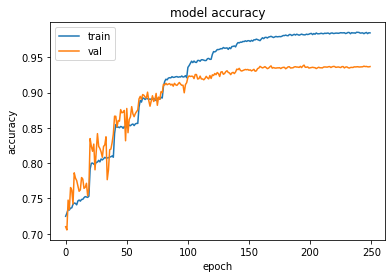

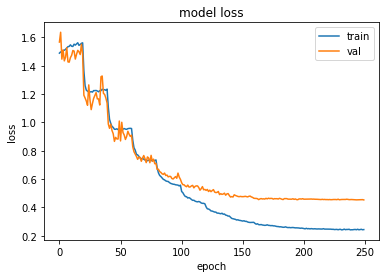

In [40]:
#history=historytemp
print(history.history.keys())
#  Ploting the accuracy graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()
# Ploting the loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='best')
plt.show()

## Prediction on test set

In [42]:
res=pd.DataFrame(np.argmax(model.predict(test), axis=1))

In [43]:
res.index = test_data.index
res.columns = ["prediction"]
res.to_csv("final_predictions.csv") 